### This code is an implementation of multi-variate polynomial regression with sklearn

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

%matplotlib inline

import numpy as np 
import scipy as sp

import matplotlib.pyplot as plt
from numpy import linalg, zeros, ones, hstack, asarray
import itertools
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv("/Users/waldo/AI HUB/Project/FinallProject/Dataset/us_daily_enhanced.csv")
df.head()

,date,datenum,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200720,128.0,56,3813916,42655608,3003.0,58330.0,279030.0,6558.0,12475.0,...,2020-07-20T00:00:00Z,46472527,46469524,46469524,365,1652,677249,57948,735197,67d367af6c685d8ba81dd2d4f9ea953c9e8a4d1e
1,20200719,127.0,56,3755968,41978359,3052.0,57790.0,277378.0,6391.0,12391.0,...,2020-07-19T00:00:00Z,45737379,45734327,45734327,523,939,704916,63907,768823,8ebbf82831bb2025b7603a8bf00ae9cbd7747175
2,20200718,126.0,56,3692061,41273443,3032.0,57559.0,276439.0,6396.0,12342.0,...,2020-07-18T00:00:00Z,44968536,44965504,44965504,872,2003,696591,65180,761771,f27f83f9107b0cda5f154c50ba724c7df59b4ddd
3,20200717,125.0,56,3626881,40576852,3002.0,57705.0,274436.0,6453.0,12243.0,...,2020-07-17T00:00:00Z,44206735,44203733,44203733,951,2678,774555,77233,851788,2fd5fa9462df840f6808d6757e4d13f702be8fdb
4,20200716,124.0,56,3549648,39802297,2929.0,57369.0,271758.0,6359.0,12091.0,...,2020-07-16T00:00:00Z,43354874,43351945,43351945,974,2215,753635,70953,824588,8644aacf2b4997ff08daf87ae088c7f6a44cb367


(128, 2)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


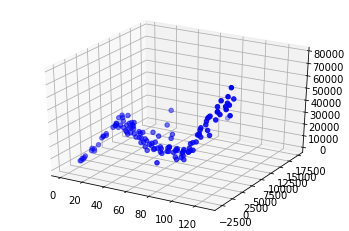

In [3]:
df = df[(df['datenum'] < 129) & (df['datenum'] > 0)]
df_x1 = df['datenum']
df_x2 = df['hospitalizedIncrease']
df_y = df['positiveIncrease']
df_x = pd.concat([df_x1,df_x2],axis=1)

df_y = pd.DataFrame(data=df_y, columns=['positiveIncrease'])
print(df_x.shape)
print (type(df_x))
print (type(df_y))
df_x.head()
df_y.head()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df_x1, df_x2, df_y, color='blue')


In [4]:
i_train, i_test = train_test_split(range((df_x.values).shape[0]),train_size=0.9, random_state = 1
                                  )

X_train1 = df_x.datenum[i_train]
X_train2 = df_x.hospitalizedIncrease[i_train]
X_train = pd.concat([X_train1,X_train2],axis=1).values

#X_train = preprocessing.scale(X_train)
X_train = preprocessing.normalize(X_train)
print(X_train.shape)

y_train = df_y.positiveIncrease[i_train]

print(y_train.shape)

X_test1 = df_x.datenum[i_test]
X_test2 = df_x.hospitalizedIncrease[i_test]
X_test = pd.concat([X_test1,X_test2],axis=1).values
#X_test = preprocessing.scale(X_test)
X_test = preprocessing.normalize(X_test)
print(X_test.shape)

y_test = df_y.positiveIncrease[i_test]

print(y_test.shape)

#Initialize a list for R-square score
score_all = []

for d in range(1,11):
#Generate polynomial features
    poly = PolynomialFeatures(degree=d)

#Transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
    X_train_poly = poly.fit_transform(X_train)

#Transform the prediction to fit the model type
    X_test_poly = poly.fit_transform(X_test)

#Here we can remove polynomial orders we don't want. For instance I'm removing the `x` component
    #X_train_poly = np.delete(X_train_poly,(1),axis=1)
    #X_test_poly = np.delete(X_test_poly,(1),axis=1)

#Generate the regression object
    clf = Lasso(alpha = 0.01,max_iter = 1000000)
#Preform the actual regression
    clf.fit(X_train_poly, y_train)
    scores = clf.score(X_train_poly,y_train)
    #scores = cross_val_score(clf, X_train_poly, y_train, cv=5, scoring = 'neg_mean_squared_error')
    #print(clf.predict(X_train_poly).shape)
    #print(y_train.shape)
    score_all.append(scores.mean())

    print("Prediction in degree = {} ".format(d),clf.predict(X_test_poly))
    print("====================================")
print("Score = ",score_all)

bestd = np.argmin(score_all)
print("The best degree is ",bestd+1)

print("====================================")
poly = PolynomialFeatures(degree=bestd)

#Transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_train_poly = poly.fit_transform(X_train)

#Transform the prediction to fit the model type
X_test_poly = poly.fit_transform(X_test)

#Here we can remove polynomial orders we don't want. For instance I'm removing the `x` component
#X_train_poly = np.delete(X_train_poly,(1),axis=1)
#X_test_poly = np.delete(X_test_poly,(1),axis=1)

#Generate the regression object
clf = Lasso(alpha = 0.01,max_iter = 1000000)
#Preform the actual regression
clf.fit(X_train_poly, y_train)


test_data = [[129,1000]]
test_data_processed = preprocessing.normalize(test_data)
test_data_poly = poly.fit_transform(test_data_processed)
#test_data_poly = np.delete(test_data_poly,(1),axis=1)


print("The prediction based on {} is ".format(test_data[0]),clf.predict(test_data_poly)[0])

rscores = cross_val_score(clf, X_test_poly, y_test, cv=5, scoring = 'r2')
print("R-square of this model is ", np.mean(rscores))

(115, 2)
(115,)
(13, 2)
(13,)
Prediction in degree = 1  [30962.29437762 30919.94097744 30956.95811717 30294.09670787
 30172.47944667 30915.84880045 28390.85260324 29294.72730078
 30410.31784278 30470.24754699 30955.25227158 30941.67976745
 30451.39528367]
Prediction in degree = 2  [23970.90526355 25213.81752455 24131.20255472 36485.63205903
 37312.98623088 25330.37086281 16586.79688993 33289.63197551
 35314.19843876 34557.45462199 24182.21879799 24584.2370646
 34806.99392151]
Prediction in degree = 3  [23985.20504098 25202.99436887 24141.93610575 36558.29415449
 37422.38034049 25317.4927417  15791.7790747  33144.82884259
 35345.70081541 34567.63398013 24191.83744316 24585.41106091
 34823.79031137]
Prediction in degree = 4  [24680.96453673 25543.09431188 24789.14900835 36530.06489034
 37756.48888607 25626.72407541 11840.17888041 33485.55587008
 35000.16657912 34088.97922674 24823.76405597 25099.67332912
 34383.93928922]
Prediction in degree = 5  [24760.49044375 25586.97307674 24863.8823